In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv('/content/Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [ ]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 27s - loss: 0.0321 - 27s/epoch - 778ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0112 - 7s/epoch - 197ms/step
Epoch 3/20
35/35 - 9s - loss: 0.0097 - 9s/epoch - 251ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0089 - 7s/epoch - 196ms/step
Epoch 5/20
35/35 - 9s - loss: 0.0073 - 9s/epoch - 252ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0085 - 7s/epoch - 196ms/step
Epoch 7/20
35/35 - 9s - loss: 0.0080 - 9s/epoch - 253ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 196ms/step
Epoch 9/20
35/35 - 9s - loss: 0.0066 - 9s/epoch - 253ms/step
Epoch 10/20
35/35 - 10s - loss: 0.0061 - 10s/epoch - 279ms/step
Epoch 11/20
35/35 - 10s - loss: 0.0069 - 10s/epoch - 282ms/step
Epoch 12/20
35/35 - 10s - loss: 0.0057 - 10s/epoch - 299ms/step
Epoch 13/20
35/35 - 12s - loss: 0.0051 - 12s/epoch - 337ms/step
Epoch 14/20
35/35 - 9s - loss: 0.0056 - 9s/epoch - 261ms/step
Epoch 15/20
35/35 - 9s - loss: 0.0056 - 9s/epoch - 252ms/step
Epoch 16/20
35/35 - 9s - loss: 0.0061 - 9s/epoch - 258ms/step
Epoch 1

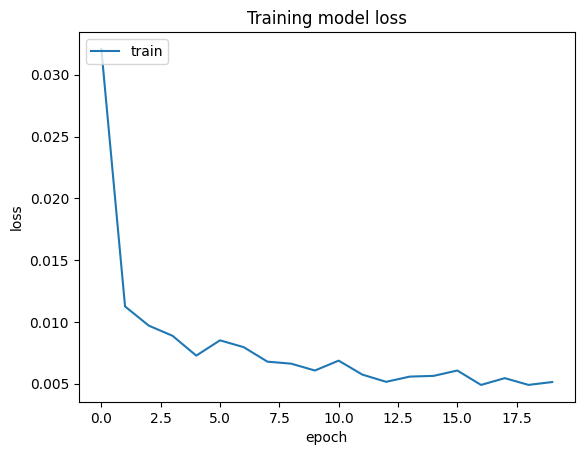

In [ ]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
testData = pd.read_csv('/content/Google_train_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1089, 60, 1)

In [ ]:
y_pred = model.predict(X_test)

35/35 [==============================] - 4s 67ms/step


In [ ]:
predicted_price = sc.inverse_transform(y_pred)

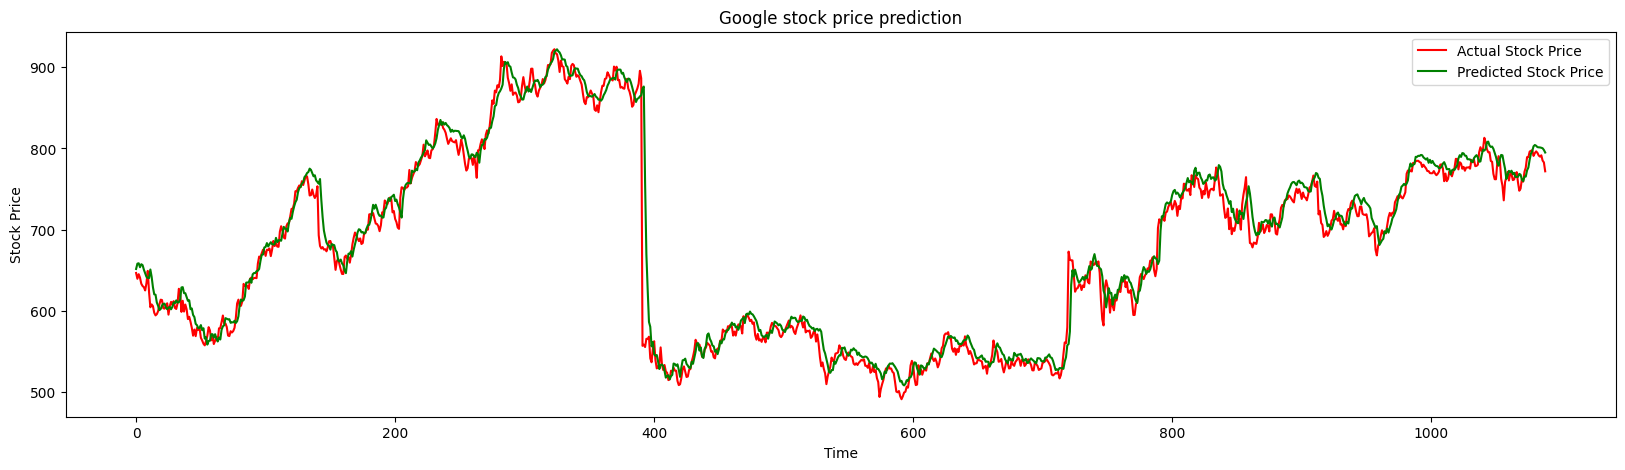

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Using CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [ ]:
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

In [ ]:
model_cnn.fit(X_train_cnn, y_train, epochs=20, verbose=2)

Epoch 1/20
35/35 - 1s - loss: 0.0307 - 1s/epoch - 36ms/step
Epoch 2/20
35/35 - 0s - loss: 0.0075 - 323ms/epoch - 9ms/step
Epoch 3/20
35/35 - 1s - loss: 0.0077 - 804ms/epoch - 23ms/step
Epoch 4/20
35/35 - 1s - loss: 0.0046 - 781ms/epoch - 22ms/step
Epoch 5/20
35/35 - 0s - loss: 0.0041 - 399ms/epoch - 11ms/step
Epoch 6/20
35/35 - 0s - loss: 0.0043 - 340ms/epoch - 10ms/step
Epoch 7/20
35/35 - 0s - loss: 0.0038 - 325ms/epoch - 9ms/step
Epoch 8/20
35/35 - 0s - loss: 0.0042 - 356ms/epoch - 10ms/step
Epoch 9/20
35/35 - 0s - loss: 0.0037 - 250ms/epoch - 7ms/step
Epoch 10/20
35/35 - 0s - loss: 0.0038 - 207ms/epoch - 6ms/step
Epoch 11/20
35/35 - 0s - loss: 0.0040 - 198ms/epoch - 6ms/step
Epoch 12/20
35/35 - 0s - loss: 0.0036 - 204ms/epoch - 6ms/step
Epoch 13/20
35/35 - 0s - loss: 0.0054 - 195ms/epoch - 6ms/step
Epoch 14/20
35/35 - 0s - loss: 0.0031 - 194ms/epoch - 6ms/step
Epoch 15/20
35/35 - 0s - loss: 0.0029 - 219ms/epoch - 6ms/step
Epoch 16/20
35/35 - 0s - loss: 0.0032 - 201ms/epoch - 6ms/ste

In [ ]:
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_pred_cnn = model_cnn.predict(X_test_cnn)

35/35 [==============================] - 0s 4ms/step


In [ ]:
predicted_price_cnn = sc.inverse_transform(y_pred_cnn)

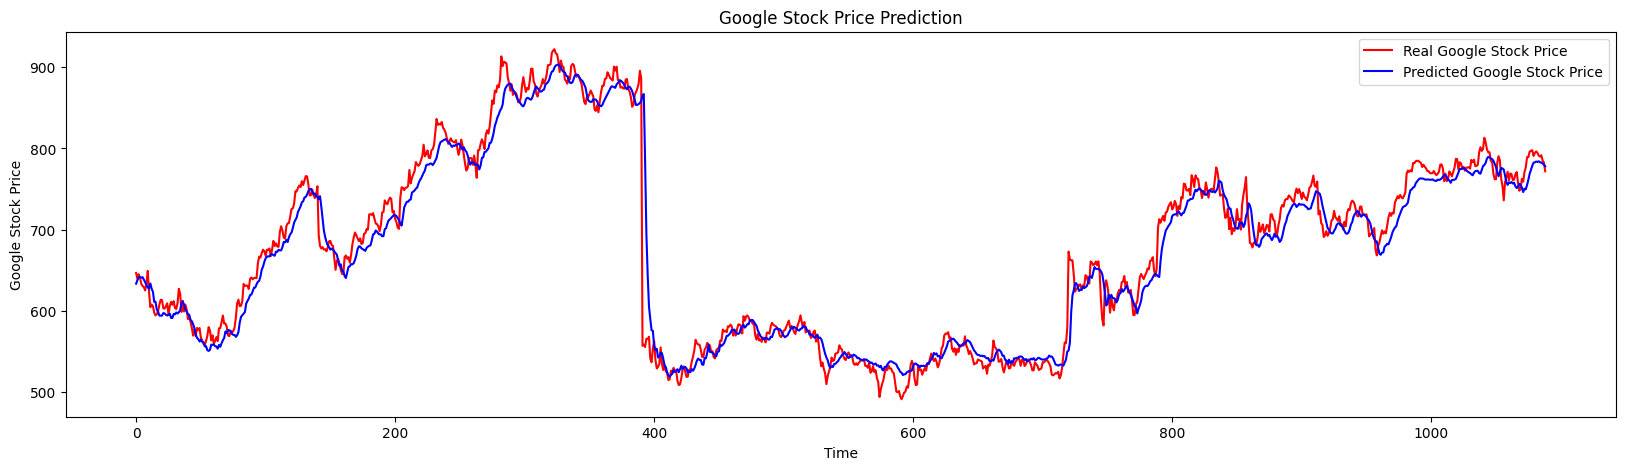

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_price_cnn, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()